In [1]:
!pip install selenium beautifulsoup4
!pip install google-play-scraper
!pip install seaborn
!pip install konlpy
!pip install tqdm
!pip install plotly

##### 커널 재시작해야 반영됨 Jupyter: Kernel > Restart
!pip install --upgrade pillow
!pip install --upgrade wordcloud


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#######################################
##### 1. 플레이스토어 리뷰 크롤링 #####
#######################################

from google_play_scraper import reviews, Sort
import pandas as pd
import datetime
import time

# 라프텔 앱 ID
app_id = 'laftel.net.laftel'

# 수집 기준 날짜 설정
# AVOD 서비스 기간: 2018-11-01 ~ 2025-06-29
avod_start_date = datetime.datetime(2018, 11, 1)
avod_end_date = datetime.datetime(2025, 6, 30, 0, 0, 0)

# 최대 수집 리뷰 수: 3천 개로 제한
max_reviews = 3000
all_reviews = []
next_token = None

# 크롤링 시작
while len(all_reviews) < max_reviews:
    new_reviews, next_token = reviews(
        app_id,
        lang='ko',         # 한국어 리뷰만
        country='kr',      # 한국
        sort=Sort.NEWEST,  # 최신순 정렬
        count=100,
        continuation_token=next_token
    )
    all_reviews.extend(new_reviews)
    # print(f"수집된 리뷰 수: {len(all_reviews)}")  # for debug
    
    if not next_token:
        break
    time.sleep(1)  # 서버 과부하 방지

# 데이터프레임으로 변환
origin_df = pd.DataFrame(all_reviews)

# 전체 리뷰 수 확인
print("✅ 크롤링 완료")
print(f"전체 리뷰 수: {len(origin_df)}")

✅ 크롤링 완료
전체 리뷰 수: 3000


In [3]:
origin_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,e7fdd0a3-7e68-4d7e-882d-39759e8f22dd,눌러,https://play-lh.googleusercontent.com/a-/ALV-U...,진짜 좋긴 좋은데 결제를 해도 등급이 나눠줘 있어서 못보는게 있어 아쉽움,4,0,3.67.0,2025-07-20 21:03:50,"안녕하세요, 라프텔 고객센터입니다. 청소년 보호법 및 정보통신망 이용촉진 및 정보보...",2025-07-21 19:35:09,3.67.0
1,ae017c02-4fb4-4b2d-b39d-6eb6a18aae17,김현지,https://play-lh.googleusercontent.com/a/ACg8oc...,"라프텔 어플을 핸드폰이랑 갤럭시탭에 다 설치해놓고 쓰고있는데, 지지난주부터 갤럭시탭...",2,0,3.67.0,2025-07-20 14:49:36,"안녕하세요, 라프텔 고객센터입니다. 라프텔은 인터넷 기반 디지털 콘텐츠 스트리밍 서...",2025-07-21 19:33:05,3.67.0
2,586743e7-3577-4683-90af-7e11592c60f5,정호영,https://play-lh.googleusercontent.com/a/ACg8oc...,굿,5,0,None,2025-07-20 12:14:45,"안녕하세요, 라프텔 고객센터입니다. 고객님께서 만족하셨다니 저희도 기쁘고 보람을 느...",2025-07-21 19:32:35,None
3,a58095c6-c5e6-4357-84f6-f0c933a0bde6,김규연,https://play-lh.googleusercontent.com/a/ACg8oc...,아아 왜 무료보기가 없어졌어요-!! 물론 청소년이라서 보려면 부모님한테 허락 받아야...,1,0,None,2025-07-20 10:31:27,"안녕하세요, 라프텔 고객센터입니다. 광고 보고 무료 보기는 관련 계약 종료로 인해 ...",2025-07-21 19:32:14,None
4,a279225d-57ef-4d1c-bac7-5428ab5a24af,김윤서,https://play-lh.googleusercontent.com/a-/ALV-U...,굿,5,0,3.67.0,2025-07-19 23:36:27,"안녕하세요, 라프텔 고객센터입니다. 고객님께서 만족하셨다니 저희도 기쁘고 보람을 느...",2025-07-21 19:31:56,3.67.0


In [5]:
##### 데이터프레임 열 정리 #####

# 날짜 형식 및 AVOD 시작일 이전 리뷰 삭제 등 전처리
own_df = origin_df.copy()
own_df['date'] = pd.to_datetime(own_df['at'])  # 열 이름 변경: at > date
own_df = own_df[own_df['date'] >= avod_start_date]

# 분석에 필요한 열만 남기기
# userName, content, score, thumbsUpCount, reviewCreatedVersion, date, replyContent, appVersion
own_df = own_df.drop(['reviewId', 'userImage', 'repliedAt', 'at'], axis=1)

# AVOD 종료 전/후 구분 열 생성
own_df['avod_end'] = own_df['date'].apply(lambda x: 'before' if x < avod_end_date else 'after')

# csv 파일로 저장
own_df.to_csv('laftel_playstore_reviews_all.csv', index=False, encoding='utf-8-sig')

# AVOD 종료 이전/이후 리뷰 수 확인
own_df['avod_end'].value_counts()

avod_end
before    2934
after       66
Name: count, dtype: int64

In [6]:
print(own_df.columns)  # 전체 열 확인

Index(['userName', 'content', 'score', 'thumbsUpCount', 'reviewCreatedVersion',
       'replyContent', 'appVersion', 'date', 'avod_end'],
      dtype='object')


In [7]:
own_df.head()

,userName,content,score,thumbsUpCount,reviewCreatedVersion,replyContent,appVersion,date,avod_end
0,눌러,진짜 좋긴 좋은데 결제를 해도 등급이 나눠줘 있어서 못보는게 있어 아쉽움,4,0,3.67.0,"안녕하세요, 라프텔 고객센터입니다. 청소년 보호법 및 정보통신망 이용촉진 및 정보보...",3.67.0,2025-07-20 21:03:50,after
1,김현지,"라프텔 어플을 핸드폰이랑 갤럭시탭에 다 설치해놓고 쓰고있는데, 지지난주부터 갤럭시탭...",2,0,3.67.0,"안녕하세요, 라프텔 고객센터입니다. 라프텔은 인터넷 기반 디지털 콘텐츠 스트리밍 서...",3.67.0,2025-07-20 14:49:36,after
2,정호영,굿,5,0,None,"안녕하세요, 라프텔 고객센터입니다. 고객님께서 만족하셨다니 저희도 기쁘고 보람을 느...",None,2025-07-20 12:14:45,after
3,김규연,아아 왜 무료보기가 없어졌어요-!! 물론 청소년이라서 보려면 부모님한테 허락 받아야...,1,0,None,"안녕하세요, 라프텔 고객센터입니다. 광고 보고 무료 보기는 관련 계약 종료로 인해 ...",None,2025-07-20 10:31:27,after
4,김윤서,굿,5,0,3.67.0,"안녕하세요, 라프텔 고객센터입니다. 고객님께서 만족하셨다니 저희도 기쁘고 보람을 느...",3.67.0,2025-07-19 23:36:27,after


In [8]:
print(own_df['avod_end'].unique())

['after' 'before']


In [9]:
##### 그래프 그리기 전 최초 1회 실행 #####
##### 글자 깨짐 방지용 #####

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

# 한글 폰트 설정
mpl.rcParams['font.family'] = 'Malgun Gothic'  # Windows OS

# 마이너스 깨짐 방지
mpl.rcParams['axes.unicode_minus'] = False

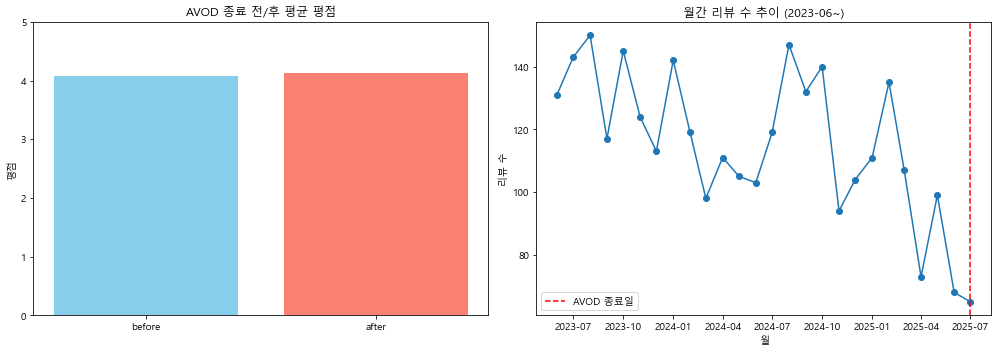

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# AVOD 서비스 종료일
avod_end_date = pd.Timestamp('2025-06-30')

# --- 1. AVOD 종료 전/후 평균 평점 ---
avg_rating = own_df.groupby('avod_end')['score'].mean()

# --- 2. 월간 리뷰 수 추이 ---
monthly_df = own_df[own_df['date'] >= '2023-06-01'].copy()  # 2023년 6월부터 측정 (1일~31일까지의 기록이 없는 직전 5월은 제외)
monthly_df['month'] = monthly_df['date'].dt.to_period('M')  # 월간 구분 열 생성
monthly_reviews = monthly_df.groupby('month').size().reset_index(name='리뷰 수')
monthly_reviews['month'] = monthly_reviews['month'].dt.to_timestamp()

# --- 시각화 ---
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
desired_order = ['before', 'after']
avg_rating = avg_rating.reindex(desired_order)  # 레이블 순서 재배치

# (1) 평균 평점 막대그래프
axes[0].bar(avg_rating.index, avg_rating.values, color=['skyblue', 'salmon'])
axes[0].set_title('AVOD 종료 전/후 평균 평점')
axes[0].set_ylim(0, 5)
axes[0].set_ylabel('평점')

# (2) 월간 리뷰 수 선그래프
axes[1].plot(monthly_reviews['month'], monthly_reviews['리뷰 수'], marker='o')
axes[1].axvline(avod_end_date, color='red', linestyle='--', label='AVOD 종료일')
axes[1].set_title('월간 리뷰 수 추이 (2023-06~)')
axes[1].set_ylabel('리뷰 수')
axes[1].set_xlabel('월')
axes[1].legend()

plt.tight_layout()
plt.show()

In [11]:
# ===============================================================================
# 1. 텍스트 전처리
# - 리뷰 텍스트를 분석 가능한 형태로 정제
# ===============================================================================

In [81]:
import pandas as pd
import re
from konlpy.tag import Okt

okt = Okt()

# 한국어 불용어 리스트 (*파일 경로 확인)
with open('stopwords-ko.txt', 'r', encoding='utf-8') as f:
    data = f.read().splitlines()
stopwords_df = pd.DataFrame(data, columns=['text'])
external_stopwords = stopwords_df['text'].tolist()

# 불용어 내부 정의
own_stopwords = ['라서', '건가', '줫으', '엇으', '이나', '지나', '아아', '여서', '거임', '너무', '하면', '하고', '하는', '있습니다', '없습니다', '없음', '있음', '있는', '없는', '있으면', '없으면', '있어서', '없어서', '마다', '통해', '때문', '제일', '매우', '더욱', '살짝', '보고', '보면', '보임', '해도', '적도', '항상', '경우', '진짜', '정말', '그냥', '고도', '입니다']

# 불용어 리스트 통합
combined_stopwords = set(external_stopwords + own_stopwords)

def preprocess_text_kor(text):
    text = re.sub(r"[^가-힣a-zA-Z\s]", "", str(text).lower())    # 특수문자 제거
    tokens = okt.morphs(text)                                    # 형태소 단위로 나누기
    tokens = [t for t in tokens if t not in combined_stopwords and len(t) > 1]  # 불용어 제거 + 한 글자 제거
    return " ".join(tokens)

own_df['okt_content'] = own_df['content'].apply(preprocess_text_kor)

In [82]:
own_df['okt_content']

0                              좋긴 좋은데 결제 등급 나눠줘 보는게 있어 아쉽
1       라프텔 어플 핸드폰 이랑 갤럭시탭 설치 해놓고 쓰고있는데 지지난 갤럭시탭 라프텔 들...
2                                                        
3       무료 보기 없어졌어요 청소년 이라서 보려면 부모님 한테 허락 받아 야하긴 다시 넣어...
4                                                        
                              ...                        
2995    광고 많아요 많아서 아쉬워요 볼건 만은데 광고 많아서 아쉬워요 광고 줄어 주세요 부...
2996                                광고 영상 나오지 않아 애니 영상 볼수
2997                     이랑 가격 다르면 구매 하기 공지 해주든가 소비자 해보네요
2998                  내고 사람 광고 볼때 봐서 편안해서 광고 안보 싶다면 는걸 추천
2999                                                만족합니다
Name: okt_content, Length: 3000, dtype: object

In [83]:
# ===============================================================================
# 2. AVOD 종료 전/후 키워드 비교
# - AVOD 종료 전/후 사용자 주요 관심사 변화 파악
# - TF-IDF 기반 키워드 비교 + 워드클라우드
# ===============================================================================

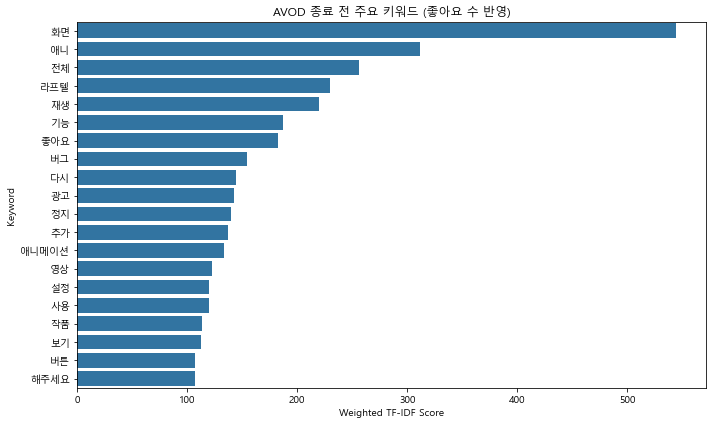

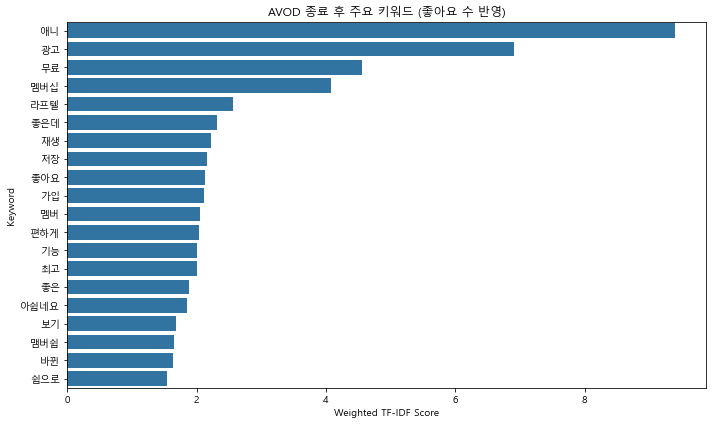

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# AVOD 종료 전/후 데이터
before_df = own_df[own_df['avod_end'] == 'before'].copy()
after_df = own_df[own_df['avod_end'] == 'after'].copy()

# NaN이나 이상치(-1 등)가 있을 수 있으니 thumbsUpCount 전처리 (null > 0)
before_df['thumbsUpCount'] = before_df['thumbsUpCount'].fillna(0)
after_df['thumbsUpCount'] = after_df['thumbsUpCount'].fillna(0)

# TF-IDF 벡터화 함수 (가중치 포함)
def get_top_weighted_tfidf_words(docs, weights, top_n=20):
    vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, ngram_range=(1,1))
    tfidf_matrix = vectorizer.fit_transform(docs)

    # 가중치 shape 맞추기
    weight_array = np.array(weights).reshape(-1, 1)

    # TF-IDF × (좋아요 수 + 1)
    weighted_tfidf = tfidf_matrix.multiply(weight_array)
    weighted_scores = weighted_tfidf.sum(axis=0).A1

    tfidf_df = pd.DataFrame({
        'term': vectorizer.get_feature_names_out(),
        'score': weighted_scores
    })
    return tfidf_df.sort_values(by='score', ascending=False).head(top_n)

# 가중치 계산을 위한 전처리: thumbsUpCount + 1(리뷰 작성자)
weights_before = before_df['thumbsUpCount'] + 1
weights_after = after_df['thumbsUpCount'] + 1

# 주요 키워드 추출 (가중치 반영)
top_words_before = get_top_weighted_tfidf_words(before_df['okt_content'], weights_before)
top_words_after = get_top_weighted_tfidf_words(after_df['okt_content'], weights_after)

# 시각화
def plot_keywords(df, title):
    plt.figure(figsize=(10,6))
    sns.barplot(x='score', y='term', data=df)
    plt.title(title)
    plt.xlabel("Weighted TF-IDF Score")
    plt.ylabel("Keyword")
    plt.tight_layout()
    plt.show()

plot_keywords(top_words_before, "AVOD 종료 전 주요 키워드 (좋아요 수 반영)")
plot_keywords(top_words_after, "AVOD 종료 후 주요 키워드 (좋아요 수 반영)")

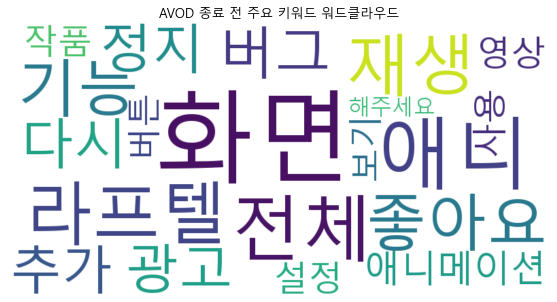

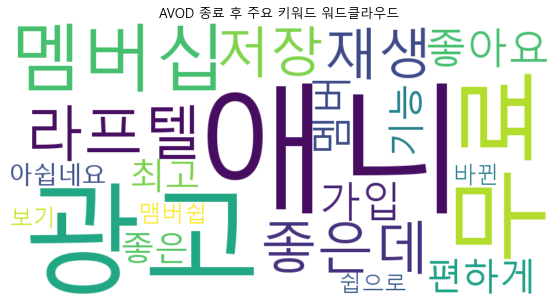

In [85]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 워드클라우드 생성 함수
def plot_weighted_wordcloud(df, title):
    word_freq = dict(zip(df['term'], df['score']))  # Keyword 크기: 가중 TF-IDF 점수에 비례
    wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',  # Windows OS
                          background_color='white',
                          width=800, height=400).generate_from_frequencies(word_freq)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=13)
    plt.axis("off")
    plt.show()

# 시각화
plot_weighted_wordcloud(top_words_before, "AVOD 종료 전 주요 키워드 워드클라우드")
plot_weighted_wordcloud(top_words_after, "AVOD 종료 후 주요 키워드 워드클라우드")

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np

# TF-IDF 버블 데이터 생성 함수
def get_tfidf_bubble_data(docs, weights=None):
    vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, ngram_range=(1,1))
    tfidf_matrix = vectorizer.fit_transform(docs)
    feature_names = vectorizer.get_feature_names_out()
    
    if weights is not None:
        weight_array = np.array(weights).reshape(-1, 1)
        tfidf_matrix = tfidf_matrix.multiply(weight_array)

    tfidf_array = tfidf_matrix.toarray()

    term_data = []
    for i, term in enumerate(feature_names):
        term_tfidf_values = tfidf_array[:, i]
        term_docs = term_tfidf_values > 0
        doc_count = term_docs.sum()
        total_score = term_tfidf_values.sum()
        if doc_count > 0:
            mean_score = total_score / doc_count
        else:
            mean_score = 0
        term_data.append({
            'term': term,
            'doc_count': doc_count,
            'mean_tfidf': mean_score,
            'total_tfidf': total_score
        })

    return pd.DataFrame(term_data).sort_values(by='total_tfidf', ascending=False)

In [87]:
import plotly.express as px

# Plotly 버블 차트 생성 함수
def plot_bubble_chart(df, title):
    fig = px.scatter(
        df,
        x='mean_tfidf',
        y='doc_count',
        size='total_tfidf',
        text='term',
        hover_data=['term', 'mean_tfidf', 'doc_count', 'total_tfidf'],
        title=title,
        size_max=60
    )
    fig.update_traces(textposition='top center')
    fig.update_layout(
        xaxis_title="평균 TF-IDF 점수",
        yaxis_title="리뷰 등장 문서 수",
        template='plotly_white'
    )
    fig.show()

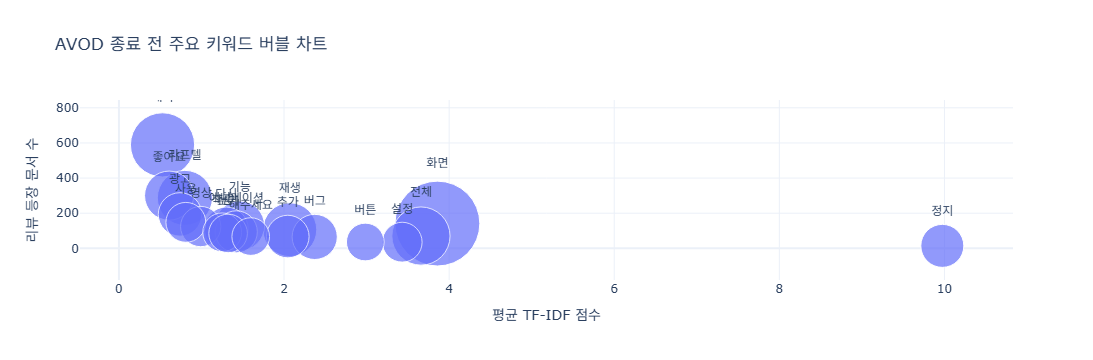

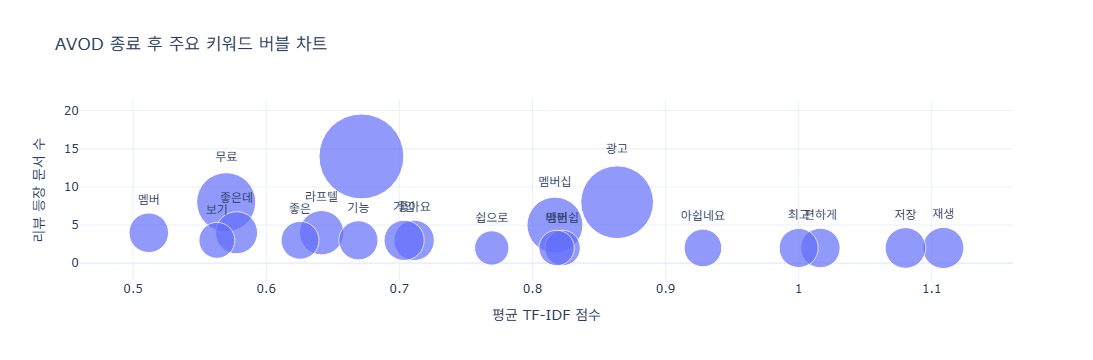

In [88]:
# TF-IDF 버블 데이터 생성
bubble_before = get_tfidf_bubble_data(before_df['okt_content'], weights_before)
bubble_after = get_tfidf_bubble_data(after_df['okt_content'], weights_after)

# 버블 차트 출력 (총 TF-IDF 점수가 높은 상위 20개 키워드)
plot_bubble_chart(bubble_before.head(20), "AVOD 종료 전 주요 키워드 버블 차트")
plot_bubble_chart(bubble_after.head(20), "AVOD 종료 후 주요 키워드 버블 차트")

In [89]:
# ===============================================================================
# 3. 감성 분석 (긍정/부정 비율)
# - 종료 전/후 긍/부정 반응 비율 비교를 통한 평판 영향 평가
# ===============================================================================

In [90]:
##### 감성 분석을 진행할 리뷰 필터링
##### 조건1. '광고', '무료', '멤버십' 등 AVOD 이슈 관련 리뷰들
##### 조건2. 라프텔 리뷰 답변(replyContent)에 '광고' 단어가 포함된 리뷰들

target_keywords = ['광고', '무료', '유료', '멤버십', '멤버쉽', '멤버', '결제', 'AVOD']

# 전처리 - 모두 소문자, 공백 제거 등
own_df['content'] = own_df['content'].astype(str)
own_df['replyContent'] = own_df['replyContent'].astype(str)

# 조건1: content에 광고, 무료, 멤버십 등 포함된 리뷰
condition1 = own_df['content'].str.contains('|'.join(target_keywords), case=False, na=False)

# 조건2: replyContent에 '광고' 포함된 리뷰
condition2 = own_df['replyContent'].str.contains('광고', case=False, na=False)

# 두 조건 모두 만족하는 리뷰 필터링
for_sentiment_df = own_df[condition1 & condition2].copy()

print(f"총 필터링된 리뷰 수: {len(for_sentiment_df)}")

총 필터링된 리뷰 수: 78


In [91]:
##### KoNLPy + 감성 사전(JSON) 기반 (가중치 적용: 좋아요 수)

import pandas as pd
import json
import requests
from konlpy.tag import Okt
from tqdm import tqdm

# tqdm 적용
tqdm.pandas()
okt = Okt()

# JSON 감성 사전 링크
url = 'https://raw.githubusercontent.com/park1200656/KnuSentiLex/master/data/SentiWord_info.json'
response = requests.get(url)
sentiment_dict = json.loads(response.text)

# 감성 사전을 딕셔너리로 재구성: word -> polarity
senti_score = {item['word']: int(item['polarity']) for item in sentiment_dict}

# 감성 점수 계산 함수
def analyze_sentiment(text, thumbs_up=0):
    tokens = okt.morphs(str(text))
    score_sum = 0
    count = 0

    for word in tokens:
        if word in senti_score:
            score_sum += senti_score[word]
            count += 1

    if count == 0:
        return '중립'

    avg_score = score_sum / count
    weighted_score = avg_score * (thumbs_up + 1)  # 좋아요 수 가중치 부여

    # 감성 분류
    if weighted_score >= 1.5:
        return '매우 긍정'
    elif weighted_score >= 0.5:
        return '긍정'
    elif weighted_score > -0.5:
        return '중립'
    elif weighted_score > -1.5:
        return '부정'
    else:
        return '매우 부정'

# 감성분석 실행
for_sentiment_df['sentiment_label'] = for_sentiment_df.progress_apply(
    lambda row: analyze_sentiment(row['content'], row['thumbsUpCount']), axis=1
)

100%|█████████████████████████████████████████████████████████████████████████████████| 78/78 [00:00<00:00, 146.17it/s]


<Figure size 720x432 with 0 Axes>

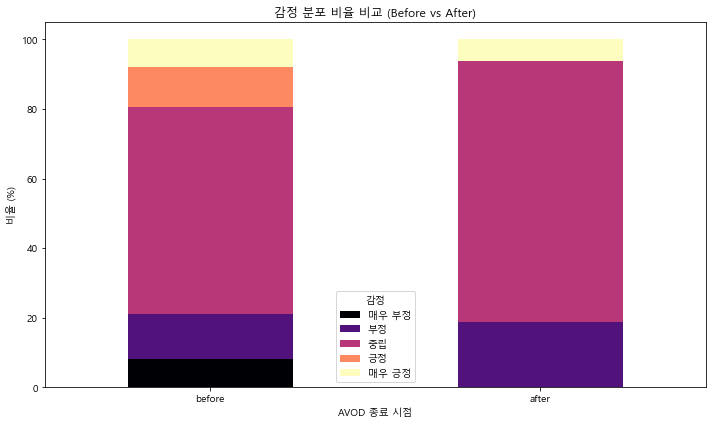

In [92]:
##### 시각화1: 감정 분포 비율 막대그래프 (Before vs After)

import matplotlib.pyplot as plt
import seaborn as sns

# 감정 비율 집계 함수
def get_sentiment_ratio(df, label='sentiment_label'):
    total = len(df)
    return df[label].value_counts(normalize=True).sort_index() * 100  # 비율(%)

# 구간 분리
before_df = for_sentiment_df[for_sentiment_df['avod_end'] == 'before']
after_df = for_sentiment_df[for_sentiment_df['avod_end'] == 'after']

# 비율 계산
before_ratio = get_sentiment_ratio(before_df)
after_ratio = get_sentiment_ratio(after_df)

# 병합
ratio_df = pd.DataFrame({'before': before_ratio, 'after': after_ratio}).fillna(0).T
ratio_df = ratio_df[['매우 부정', '부정', '중립', '긍정', '매우 긍정']]  # 순서 정렬

# 시각화
plt.figure(figsize=(10, 6))
ratio_df.plot(kind='bar', stacked=True, colormap='magma', figsize=(10, 6))
plt.title('감정 분포 비율 비교 (Before vs After)')
plt.ylabel('비율 (%)')
plt.xlabel('AVOD 종료 시점')
plt.xticks(rotation=0)
plt.legend(title='감정')
plt.tight_layout()
plt.show()

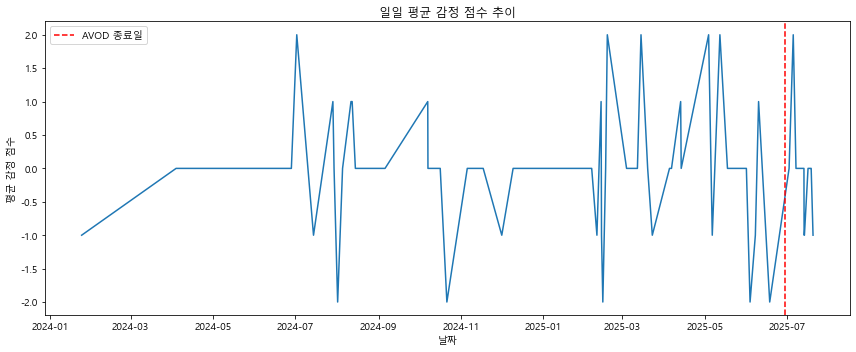

In [93]:
##### 시각화2: 일일 평균 감정 점수 추세선

# 감정 라벨을 수치로 변환 (매우 부정: -2 ~ 매우 긍정: +2)
label_map = {'매우 부정': -2, '부정': -1, '중립': 0, '긍정': 1, '매우 긍정': 2}
for_sentiment_df['sentiment_score'] = for_sentiment_df['sentiment_label'].map(label_map)

# 일일 평균 감정 점수
daily_avg = for_sentiment_df.groupby('date')['sentiment_score'].mean().reset_index()

# 시각화
plt.figure(figsize=(12, 5))
sns.lineplot(data=daily_avg, x='date', y='sentiment_score')
plt.axvline(pd.to_datetime('2025-06-30'), color='red', linestyle='--', label='AVOD 종료일')
plt.title('일일 평균 감정 점수 추이')
plt.ylabel('평균 감정 점수')
plt.xlabel('날짜')
plt.legend()
plt.tight_layout()
plt.show()

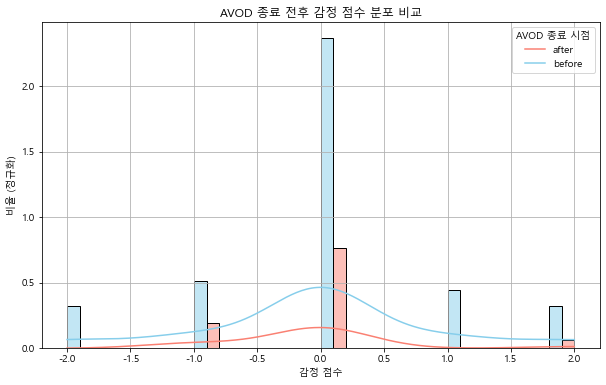

In [94]:
##### 시각화3: 감정 점수 분포 비교 히스토그램

import seaborn as sns

plt.figure(figsize=(10, 6))

# 감정 점수 히스토그램 (정규화)
sns.histplot(
    data=for_sentiment_df,
    x='sentiment_score',
    hue='avod_end',
    hue_order=['before', 'after'],  # 순서 정렬
    kde=True,
    stat="density",
    bins=20,
    palette={'before': 'skyblue', 'after': 'salmon'},
    multiple="dodge"
)

plt.xlabel('감정 점수')
plt.ylabel('비율 (정규화)')
plt.title('AVOD 종료 전후 감정 점수 분포 비교')
plt.legend(title='AVOD 종료 시점', labels=['after', 'before'])
plt.grid(True)
plt.show()

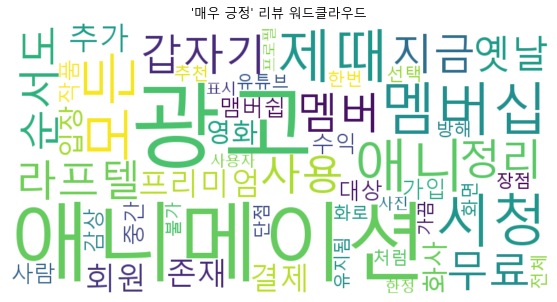

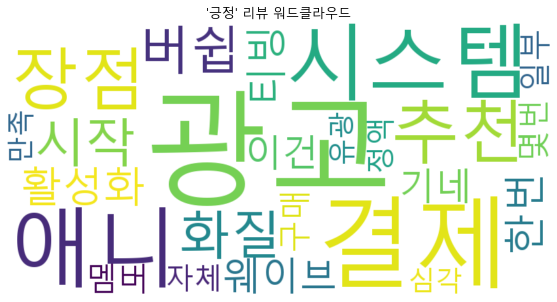

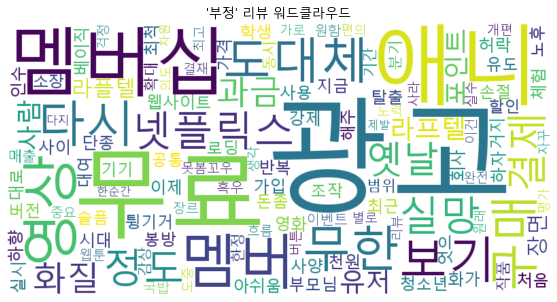

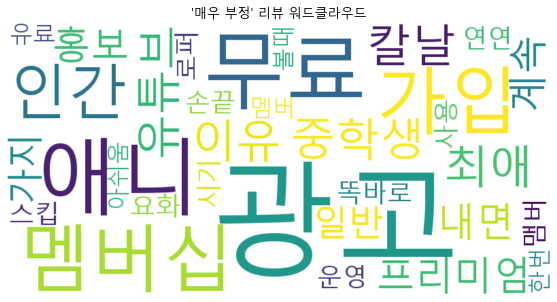

In [95]:
##### 시각화4: 감정 라벨별 워드클라우드 생성

from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

# 워드클라우드 생성 함수
def make_wordcloud(df, label):
    texts = df[df['sentiment_label'] == label]['okt_content']
    tokens = []

    for text in texts:
        tokens.extend(okt.nouns(str(text)))

    word_freq = Counter(tokens)
    wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',  # Windows OS
                          background_color='white',
                          width=800, height=400).generate_from_frequencies(word_freq)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"'{label}' 리뷰 워드클라우드", fontsize=13)
    plt.axis('off')
    plt.show()
    
# 시각화 (중립 제외)
for label in ['매우 긍정', '긍정', '부정', '매우 부정']:
    make_wordcloud(for_sentiment_df, label)